In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
amazon = pd.read_csv('/Users/spencerfogelman/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt', header=None, delimiter='\t').dropna()

In [25]:
amazon.columns = ['Message', 'Classification']

In [26]:
print(amazon.head())
print(amazon.shape)

                                             Message  Classification
0  So there is no way for me to plug it in here i...               0
1                        Good case, Excellent value.               1
2                             Great for the jawbone.               1
3  Tied to charger for conversations lasting more...               0
4                                  The mic is great.               1
(1000, 2)


In [43]:
amazon['Classification'].value_counts()

True     500
False    500
Name: Classification, dtype: int64

In [27]:
keywords = ['good', 'wow', 'amazing', 'awesome', 'wonderful', 'incredible', 'loved', 'excellent', 'genius', 'wow', 'liked'
           'waste', 'poor', 'dumb', 'bad', 'stupid', 'mistake', 'disliked', 'hated', 'disappointed', 'worst', 'regret'
           ]

for key in keywords:
    amazon[str(key)] = amazon.Message.str.contains(' ' + str(key) + ' ', case=False)
amazon['Classification'] = (amazon['Classification'] == 1)

In [28]:
amazon.head()

,Message,Classification,good,wow,amazing,awesome,wonderful,incredible,loved,excellent,...,poor,dumb,bad,stupid,mistake,disliked,hated,disappointed,worst,regret
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
amazon.isnull().sum()

Message           0
Classification    0
good              0
wow               0
amazing           0
awesome           0
wonderful         0
incredible        0
loved             0
excellent         0
genius            0
likedwaste        0
poor              0
dumb              0
bad               0
stupid            0
mistake           0
disliked          0
hated             0
disappointed      0
worst             0
regret            0
dtype: int64

In [30]:
data = amazon[keywords]
target = amazon['Classification']

In [31]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    amazon.shape[0],
    (target != y_pred).sum())
     )

Number of mislabeled points out of a total 1000 points : 462


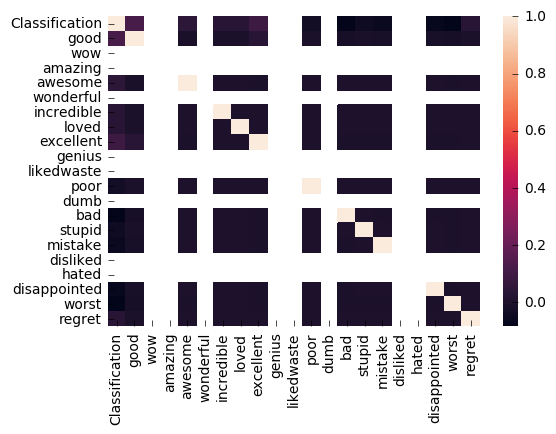

In [32]:
sns.heatmap(amazon.corr())
plt.show()

In [33]:
bnb.score(data, target)

0.538

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[488,  12],
       [450,  50]])

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.52, 0.55, 0.54, 0.54, 0.52, 0.57, 0.52, 0.5 , 0.56, 0.51])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
bnb.fit(X_train, y_train).score(X_test, y_test)

0.52

In [37]:
yelp = pd.read_csv('/Users/spencerfogelman/Downloads/sentiment labelled sentences/yelp_labelled.txt', header=None, delimiter='\t')

In [38]:
yelp.columns = ['Message', 'Classification']

In [39]:
yelp.head()
print(yelp.shape)

(1000, 2)


In [40]:
keywords = ['good', 'wow', 'amazing', 'awesome', 'wonderful', 'incredible', 'loved', 'excellent', 'genius', 'wow', 'liked'
           'waste', 'poor', 'dumb', 'bad', 'stupid', 'mistake', 'disliked', 'hated', 'disappointed', 'worst', 'regret'
           ]

for key in keywords:
    yelp[str(key)] = amazon.Message.str.contains(' ' + str(key) + ' ', case=False)

In [41]:
data_new = yelp[keywords]
target_new = yelp['Classification']

In [42]:
bnb2 = BernoulliNB()

bnb2.fit(data, target)

y_pred = bnb2.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    yelp.shape[0],
    (target != y_pred).sum())
     )

Number of mislabeled points out of a total 1000 points : 462
